# FIT 3139 Assignment 2

## Part 1

### Question proposed

How does an isolated 3 species system with a hierarchical food chain affect the growth and death rates of each other?

### Model extension

I have selected the **Lotka-Volterra model** to simulate this scenario. Although, the Lotka-Volterra model is usually used for 2 species predator-prey interactions, I have extended it to include a third species. In this scenario, there exists a food chain as follows - 
grass < deer < lion i.e. grass is eaten by a deer and deer is eaten by a lion, however lion does not eat grass.

**The scenario is as follows:**
- Species 1: Grass
- Species 2: Deer (middle predator)
- Species 3: Lion (top predator)

In the model, the grass grows and survives to an extent i.e. up to a certain density after which it stops growing (logistic growth), this grass is eaten by deer which in turn are eaten by lions.

#### Model equations

$$
\begin{aligned}

\frac{dG}{dt} &= \alpha G (1 - \frac{G}{k}) - \beta G D \\
\frac{dD}{dt} &= \gamma G D - \delta D - \epsilon D L \\
\frac{dL}{dt} &= \eta D L - \mu L - \theta L \\

\end{aligned}

\\

\begin{align*}
\text{where, } \\

\text{Growth coefficients:} \\
& \alpha = \text{growth rate coefficient of the grass} \\
& \gamma = \text{growth rate from grazing} \\
& \eta = \text{growth rate as a result of hunting prey} \\

\text{Death coefficients:} \\
& k = \text{logistic growth coefficient / max amount of grass / death period of grass} \\
& \beta = \text{death rate coefficient as a result of being grazed} \\
& \epsilon = \text{death rate as a result of being hunted} \\
& \delta = \text{natural death rate} \\
& \mu = \text{natural death rate} \\
& \theta = \text{death rate as a result of fighting each other/territorial wars} \\
\end{align*}
$$
### Description of the equations

- The first equation represents the growth of grass. The first term represents the logistic growth of grass which has been included to simulate the scenario where grass grows up to a certain density and then stops growing (maybe due to limited soil resouces etc). The second term represents the death of grass due to grazing by deer.
- The second equation represents the growth of deer. The first term represents the growth of deer due to grazing on grass, the second term represents the natural death of deer and the third term represents the death of deer due to hunting by lions.
- The third equation represents the growth of lions. The first term represents the growth of lions due to hunting deer, the second term represents the natural death of lions and the third term represents the death of lions due to fighting with each other.


### How will the above equations answer my question?

The above equations will help me simulate the scenario where the three species coexist in a hierarchical food chain. The model will help me understand how the three species interact with each other and how they survive in nature.
I expect that for the three species to survive in nature, the growth rates of the lower species should be higher than the total cumulative death rates (natural + hunted + other factors) and the growth rates of the species higher up in the food chain should controlled by the growth rates of the species below them in the food chain (which is what my equations represent).

In [23]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

## Part 2

### Difference equations

In part 1, I described my equations in continuous time. I'm using euler's method to create the system of difference equations to represent them in discrete time.

$$
\begin{align*}

& \text{Let there be any function F(x) such that,} \\
& \frac{dx}{dt} = F(x) \\

& \text{Using Euler's method,} \\
& F(x) = \frac{dx}{dt} \approx \frac{\Delta x}{\Delta t} \approx \frac{x(t + \Delta t) - x(t)}{\Delta t}\\
& F(x) \Delta t = x(t + \Delta t) - x(t) \\
& x(t + \Delta t) = x(t) + F(x) \Delta t \\
\end{align*}
$$

$$

\begin{aligned}
& G_{t+1} = G_t + \left( \alpha G_t \left(1 - \frac{G_t}{k}\right) - \beta G_t D_t \right) \Delta t \\
& D_{t+1} = D_t + \left( \gamma G_t D_t - \delta D_t - \epsilon D_t L_t \right) \Delta t \\
& L_{t+1} = L_t + \left( \eta D_t L_t - \mu L_t + \theta L \right) \Delta t \\

\end{aligned}
$$

In [24]:
def discrete(G_t, D_t, L_t, alpha, beta, k, gamma, delta, epsilon, eta, mu, theta, t=0, delta_t=0.001, max_iter=1000):
    G_vals = [G_t]
    D_vals = [D_t]
    L_vals = [L_t]
    t_vals = [t]

    for i in range(max_iter):
        G_t_next = G_vals[-1] + ((alpha * G_vals[-1] * (1 - G_vals[-1] / k)) - (beta * G_vals[-1] * D_vals[-1])) * delta_t
        D_t_next = D_vals[-1] + ((gamma * D_vals[-1] * G_vals[-1]) - (delta * D_vals[-1]) - (epsilon * D_vals[-1] * L_vals[-1])) * delta_t
        L_t_next = L_vals[-1] + ((eta * D_vals[-1] * L_vals[-1]) - (mu * L_vals[-1]) - (theta * L_vals[-1])) * delta_t

        G_vals.append(G_t_next)
        D_vals.append(D_t_next)
        L_vals.append(L_t_next)
        t_vals.append(t + i)
    
    return t_vals, G_vals, D_vals, L_vals


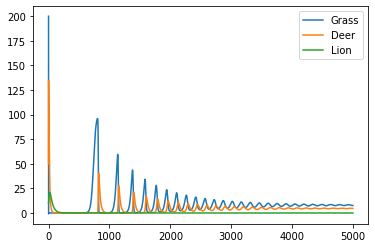

In [25]:
G0 = 200
D0 = 50
L0 = 10

natural_growth = 0.5
death_hunted = 1.5

alpha = natural_growth         # growth rate of grass
beta = 0.1                          # 
k = 100                            # max value
gamma = natural_growth / 10         # growth rate of deer by grazing grass
delta = 0.4                        # death rate of deer
epsilon = 0.02                      # death rate of deer by being hunted by lion
mu = 0.04                           # 
eta = natural_growth / 64          #
theta = 0.2

t, G, D, L = discrete(G0, D0, L0, alpha, beta, k, gamma, delta, epsilon, eta, mu, theta, t=0, delta_t=0.1, max_iter=5000)

plt.plot(t, G, label='Grass')
plt.plot(t, D, label='Deer')
plt.plot(t, L, label='Lion')
plt.legend()


The above set of parameters show a somwhat controlled environment where the lower species are able to sustain themselves albeit gradually reaching a lower steady state. The graph shows the heirarchy of the food chain where the grass is the most abundant, followed by the deer and then the lions.
This matches the expected behaviour of the system in nature.

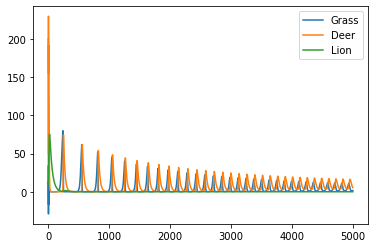

In [26]:
G0 = 200
D0 = 50
L0 = 10

natural_growth = 0.9
death_hunted = 1.5

alpha = natural_growth         # growth rate of grass
beta = 0.1                          # 
k = 100                            # max value
gamma = natural_growth / 10         # growth rate of deer by grazing grass
delta = 0.4                        # death rate of deer
epsilon = 0.02                      # death rate of deer by being hunted by lion
mu = 0.04                           # 
eta = natural_growth / 64          #
theta = 0.2

t, G, D, L = discrete(G0, D0, L0, alpha, beta, k, gamma, delta, epsilon, eta, mu, theta, t=0, delta_t=0.1, max_iter=5000)

plt.plot(t, G, label='Grass')
plt.plot(t, D, label='Deer')
plt.plot(t, L, label='Lion')
plt.legend()


The above set of parameters shows the scenario where the deer over graze the grass and eventually die out. This leads to the lions not having enough food to survive and they eventually die out as well. This is possible in nature when the lower species (grass) is not able to regenerate at a rate faster than it is being consumed by the higher species (deer and lions). This is a possible scenario in nature where the food chain collapses due to overgrazing.

This is similar to the overfishing problem in hong kong which has depleted the fish population in the region. This is a real world example of how the food chain can collapse due to overfishing similar to the scenario described above.
https://link.springer.com/article/10.1007/s11160-021-09685-5

## Part 3 - Continous time analysis


The continuous equations were provided in part 1.

In [27]:
dGdt = lambda alpha, beta, k, G, D: (alpha * G * (1 - G/k)) - (beta * G * D) 
dDdt = lambda gamma, delta, epsilon, G, D, L: (gamma * G * D) - (delta * D) - (epsilon * D * L)
dLdt = lambda mu, eta, theta, D, L: (-mu * L) + (eta * D * L) - (theta * L)

def generate_lotka_volterra(alpha, beta, k, gamma, delta, epsilon, mu, eta, theta):
    ddt = lambda t, x: np.array([
        dGdt(alpha, beta, k, x[0], x[1]),
        dDdt(gamma, delta, epsilon, x[0], x[1], x[2]),
        dLdt(mu, eta, theta, x[1], x[2]),
    ])

    return ddt


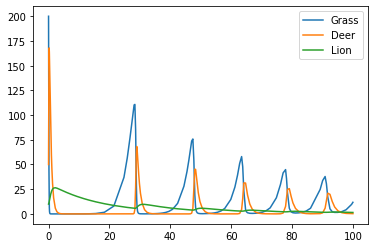

In [28]:
GROWTH_NATURAL = 0.008
DEATH = 0.02
k = 200  # max value

alpha = 64 * GROWTH_NATURAL  # growth rate of grass
beta = 0.1  #
gamma = 10 * GROWTH_NATURAL  # growth rate of deer by grazing grass
delta = 40 * DEATH  # death rate of deer
epsilon = 2 * DEATH  # death rate of deer by being hunted by lion
mu = 0.04  #
eta = GROWTH_NATURAL  #
theta = DEATH

x0 = np.array([200, 50, 10])
LV1 = generate_lotka_volterra(alpha, beta, k, gamma, delta, epsilon, mu, eta, theta)
sol = solve_ivp(fun=LV1, y0=x0, t_span=(0, 100), method="RK45")

t, (x, y, z) = sol.t, sol.y
plt.plot(t, x, label="Grass")
plt.plot(t, y, label="Deer")
plt.plot(t, z, label="Lion")
plt.legend()

### Runge-Kutta 2 implementation

In [29]:
def RK2_next(df, y, t, h, b):
    if b == 0:
        a, alpha, beta = 1, 1, 1
    else:
        a, alpha, beta = 1-b, 1/(2*b), 1/(2*b)
    k1 = df(t, y)
    k2 = df(t+alpha*h, y+beta*k1*h)
    return y + h*(a*k1 + b*k2)



def RK2(df, y0, t0=0, h=0.1, max_iter=1000, b=0.5):
    t = np.zeros(max_iter+1)
    y = np.zeros(shape=(len(y0), max_iter+1))

    t[0], y[:, 0] = t0, y0

    for i in range(max_iter):
        t[i+1] = t[i] + h
        y[:, i+1] = RK2_next(df=df, y=y[:, i], t=t[i], h=h, b=b)
    
    return t, y

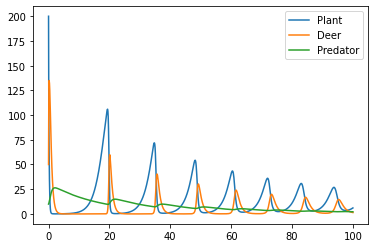

In [30]:
GROWTH_NATURAL = 0.008
DEATH = 0.02
k = 200

alpha = 64 * GROWTH_NATURAL  # growth rate of grass
beta = 0.1
gamma = 10 * GROWTH_NATURAL  # growth rate of deer by grazing grass
delta = 40 * DEATH  # death rate of deer
epsilon = 2 * DEATH  # death rate of deer by being hunted by lion
mu = 0.04
eta = GROWTH_NATURAL
theta = DEATH


x0 = np.array([200, 50, 10])
LV1 = generate_lotka_volterra(alpha, beta, k, gamma, delta, epsilon, mu, eta, theta)

t, sol = RK2(LV1, x0, max_iter=1000)
x = sol[0]
y = sol[1]
z = sol[2]
plt.plot(t, x, label="Plant")
plt.plot(t, y, label="Deer")
plt.plot(t, z, label="Predator")
plt.legend()

### Comparing discrete vs continuous analysis

The general shape of the graph is very similar however, the continuous equation more accurately show the effect of changes in population of different species.

When there is a spike in the amount of grass, the deer population starts increasing as well, which in turn results in an increase in the lions because of more abundant prey. However, as the overall amount of grass reduces, so does the population of the species higher in the food chain.

## Part 4


### Stead state analysis

Starting from dL/dt = 0, we get
$$
\begin{aligned}

\frac{dG}{dt} &= \alpha G (1 - \frac{G}{k}) - \beta G D \\
\frac{dD}{dt} &= \gamma G D - \delta D - \epsilon D L \\
\frac{dL}{dt} &= \eta D L - \mu L - \theta L \\

\end{aligned}
$$

In this analysis I'm ignoring the steady state of 0 for all species this is because the heirarchy of the food chain is such that if one of the species dies, all other species will die out as well (ignoring any evolutionary adaptation).

Setting dL/dt = 0, we get
$$
\begin{aligned}
L(\eta D - \mu - \theta) &= 0 \\
D &= \frac{\mu + \theta}{\eta}
\end{aligned}
$$

Setting dD/dt = 0, we get
$$
\begin{aligned}
D(\gamma G - \delta - \epsilon L) &= 0 \\
G &= \frac{\delta + \epsilon L}{\gamma}
\end{aligned}
$$

Setting dG/dt = 0, we get
$$
\begin{aligned}
G(\alpha (1 - \frac{G}{k}) - \beta D) &= 0 \\
\frac{G \alpha}{k} &= \alpha - \beta D \\
G &= \frac{k(\alpha - \beta D)}{\alpha}
\end{aligned}
$$

Setting both the G values to be equal

$$
\begin{aligned}
\frac{\epsilon L + \delta}{\gamma} &= \frac{k(\alpha - \beta D)}{\alpha} \\
L &= \frac{\gamma k(\alpha - \beta D)}{\alpha \epsilon} - \frac{\delta}{\epsilon}

\end{aligned}
$$

To summarise,

$$
\begin{aligned}
D &= \frac{\mu + \theta}{\eta} \\
G &= \frac{k(\alpha - \beta D)}{\alpha} \\
L &= \frac{\gamma k(\alpha - \beta D)}{\alpha \epsilon} - \frac{\delta}{\epsilon}
\end{aligned}
$$


78.125 4.666666666666667 2.4296875


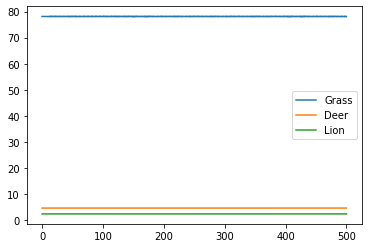

In [31]:
GROWTH_NATURAL = 0.03
DEATH = 0.1
k = 100

alpha = 640 * GROWTH_NATURAL  # growth rate of grass
beta = 0.9
gamma = 10 * GROWTH_NATURAL  # growth rate of deer by grazing grass
delta = 40 * DEATH  # death rate of deer
epsilon = 80 * DEATH  # death rate of deer by being hunted by lion
mu = 0.04
eta = GROWTH_NATURAL
theta = DEATH

x0 = np.array([200, 50, 10])
steady_state = generate_lotka_volterra(alpha, beta, k, gamma, delta, epsilon, mu, eta, theta)


D = (mu+theta)/eta
G = (alpha - (beta * D))*k/alpha
L = ((gamma * k * (alpha - (beta * D)))/(alpha * epsilon)) - (delta/epsilon)
x0 = np.array([G, D, L])
print(G, D, L)

sol = solve_ivp(fun=steady_state, y0=x0, t_span=(0, 500), method='RK45')
t = sol.t
x = sol.y[0]
y = sol.y[1]
z = sol.y[2]

plt.plot(t, x, label='Grass')
plt.plot(t, y, label='Deer')
plt.plot(t, z, label='Lion')
plt.legend()

As observed in the changes of the input, slight changes in the input can change the output drastically. This is because the system is very sensitive to the input parameters. This is a common characteristic of the Lotka-Volterra model, because of the various assumptions made in the model.

However, the above graph shows that in an ideal case the model can sustain itself with a limited set of parameters.

Text(0.5, 0, 'Z')

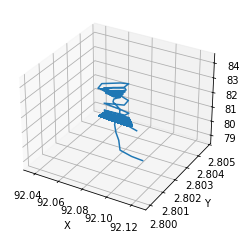

In [32]:
GROWTH_NATURAL = 0.05
DEATH = 0.1
k = 100

alpha = 640 * GROWTH_NATURAL  # growth rate of grass
beta = 0.9
gamma = 10 * GROWTH_NATURAL  # growth rate of deer by grazing grass
delta = 40 * DEATH  # death rate of deer
epsilon = 80 * DEATH  # death rate of deer by being hunted by lion
mu = 0.04
eta = GROWTH_NATURAL
theta = DEATH

x0 = np.array([200, 50, 10])
steady_state = generate_lotka_volterra(alpha, beta, k, gamma, delta, epsilon, mu, eta, theta)

D = (mu+theta)/eta
G = (alpha - (beta * D))*k/alpha
L = ((gamma * k * (alpha - (beta * D)))/(alpha * epsilon)) - (delta/epsilon)

x0 = np.array([G, D, L])

sol = solve_ivp(fun=steady_state, y0=x0, t_span=(0, 500), method='RK45')
t, (x, y, z) = sol.t, sol.y

axs = plt.figure().add_subplot(projection='3d')
axs.plot(x, y, z)
axs.set_xlabel('X')
axs.set_ylabel('Y')
axs.set_zlabel('Z')


The above graph shows the chaotic behaviour of the system when the input parameters are changed slightly. This is a common characteristic of the Lotka-Volterra model, because of the various assumptions made in the model and the several parameters used in my extension of the model that can affect the output.

## To answer my original question

In this heirarchical food chain, the growth rates of the lower species should be higher than the total cumulative death rates (natural + hunted + other factors) and the growth rates of the species higher up in the food chain should controlled by the growth rates of the species below them in the food chain. This is what my model represents and the results show that the system is able to sustain itself when the input parameters are almost "perfect". However, the system is very sensitive to changes in the input parameters and can collapse easily.

This makes sense in the real world as well, since lions don't eat grass, they are dependent on the deer for food. If the deer population collapses, the lions will not have enough food to survive and they will die out as well. If the grass dies out, the deer will not have enough food to survive and they will die out.